If you want to type along with me, head to [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata111_fa24&branch=main&urlpath=tree%2Fdata111_fa24%2Flectures%2Flec17_live.ipynb) instead. If you prefer follow along by executing the cells, stay in this notebook.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Sample Proportions

About 90% of people in the population are right handed. If I randomly sample 100 people, what proportion is right handed and what proportion is left handed?

In [2]:
handedness_proportions = make_array(0.9,0.1)
sample_proportions(100,handedness_proportions)

array([ 0.94,  0.06])

## Swain vs. Alabama ##

In [3]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [4]:
sample_proportions(100, population_proportions)

array([ 0.22,  0.78])

In [5]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [6]:
panel_proportion()

0.22

In [7]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

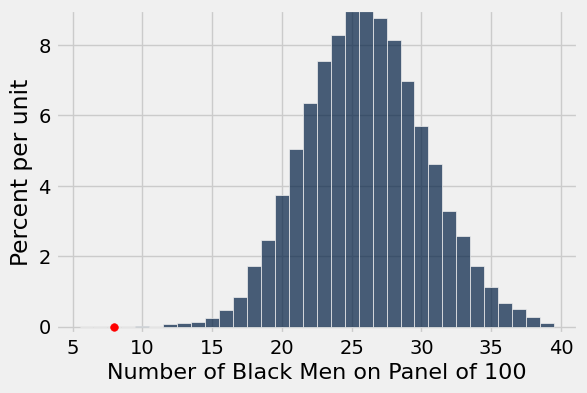

In [8]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## Mendel and Pea Flowers ##

In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [ ]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [ ]:
# Plot statistic
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist(bins = make_array(0,1,2,3,4,5))
plots.ylim(-0.02, 0.5)
plots.scatter(abs(observed_purples * 100 - 75), 0, color='red', s=40);

## Alameda County Jury Panels ##

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

In [ ]:
jury.barh('Ethnicity')

In [ ]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [ ]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

In [ ]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

In [ ]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [ ]:
#  In the Mendel model from before, the difference between observed white/purple
# and their expected values (25%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

## Total Variation Distance

In [ ]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [ ]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

In [ ]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

In [ ]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))